# Programação para Sensoriamento Remoto
<hr style="border:2px solid #0077b9;">

- Professores:
  - Gilberto Ribeiro de Queiroz
  - Thales Sehn Körting
  - Eugênio Almeida
- Colaboradoes:
  - Vitor Gomes

## Objetivo
<hr style="border:2px solid #0077b9;">

Utilizar as bibliotecas Pandas, GeoPandas e Matplotlib para realizar análise exploratória de dados.

Para cumprir nosso objetivo iremos utilizar os dados de focos de queimadas para o Estado do Tocantins do ano de 2016.

##  Pandas e GeoPandas: análise de dados em Python
<hr style="border:2px solid #0077b9;">

<table>
<tr>
<td><img src="http://pandas.pydata.org/_static/pandas_logo.png" alt="Python Data Analysis Library" style="height: 100px;"/></td>
</tr>
<tr>
<td><img src="http://geopandas.org/_images/world_gdp_per_cap_red.png" alt="Python Data Analysis Library" style="height: 300px;"/></td>
</tr>
</table>

### Pandas

- `Series`
- `DataFrame`

### GeoPandas

- `GeoSeries`: um vetor contendo uma representação geométrica em conformidade com os tipos da *OGC Simple Feature* (`Point`, `LineString`, `Polygon`, `MultiPoint`, `MultiLineString`, `MultiPolygon`).

- `GeoDataFrame`: 

## Dados de Entrada
<hr style="border:2px solid #0077b9;">

<table style="font-size: 20px;">
<caption>Arquivo ESRI Shapefile contendo os focos de queimadas do ano de 2016.</caption>
<tr>
  <td>
    <img src="../img/focos-2016.png" alt="Focos Brasil no ano de 2016" style="height: 300px;" align="middle"/>
  </td>
  <td>
    <table>
      <caption>Sensores/Satélites</caption>
      <tbody>
      <tr>
        <td style="text-align: left">AQUA_M-M</td>
        <td style="text-align: left">NOAA-15</td>    
        <td style="text-align: left">NOAA-19D</td>
      </tr>
      <tr>
        <td style="text-align: left">AQUA_M-T</td>
        <td style="text-align: left">NOAA-15D</td>    
        <td style="text-align: left">NPP</td>  
      </tr>
      <tr>
        <td style="text-align: left">GOES-13`</td>
        <td style="text-align: left">NOAA-18</td>
        <td style="text-align: left">NPP_375</td> 
      </tr>
      <tr>
        <td style="text-align: left">METOP-B</td>    
        <td style="text-align: left">NOAA-18D</td>
        <td style="text-align: left">TERRA_M-M</td> 
      </tr>
      <tr>
        <td style="text-align: left">MSG-03</td>    
        <td style="text-align: left">NOAA-19</td>
        <td style="text-align: left">TERRA_M-T</td>  
      </tr>
      </tbody>
    </table>
  </td>
</tr>
</table>

## Configurações Iniciais do Script
<hr style="border:2px solid #0077b9;">

No Python 2.7, precisamos notificar o interpretador para que ele aceite caracteres em utf-8 (ou outra codificação desejada):

In [184]:
# encoding: utf-8

Para que o *notebook IPython* coloque as figuras geradas pela matplotlib *inline*:

In [122]:
%matplotlib inline

Vamos importar as bibliotecas `pandas`, `geopandas` e `matplotlib` para podermos manipular os dados com focos de queimada usando um `GeoDataFrame`:

In [123]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Explorando os Focos de Queimadas
<hr style="border:2px solid #0077b9;">


Abrir o shapefile e transformá-lo em um `GeoDataFrame`:

In [124]:
focos = gpd.read_file("/home/gribeiro/Dados/Queimadas/focos/focos-to-2016.shp")

Vamos ver uma amostra dos dados:

In [125]:
focos.head()

,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,geometry
0,49684932.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016/02/12 17:05:45.000,f,0.578124,POINT (-47.607 -5.673)
1,49685028.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016/07/17 04:00:00.000,f,0.820325,POINT (-47.606 -5.581)
2,49685038.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,AQUA_M-T,Cerrado,2016/01/15 16:40:14.000,t,0.510514,POINT (-47.734 -5.562)
3,49685048.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016/07/17 04:00:00.000,f,0.475267,POINT (-47.605 -5.58)
4,49685058.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016/02/12 17:05:45.000,f,0.012324,POINT (-47.606 -5.677)


Podemos descobrir os tipos de dados das colunas do `GeoDataFrame` através do atributo `dtypes`: 

In [10]:
focos.dtypes

id            float64
municipio      object
estado         object
regiao         object
pais           object
satelite       object
bioma          object
timestamp      object
satelite_r     object
rand          float64
geometry       object
dtype: object

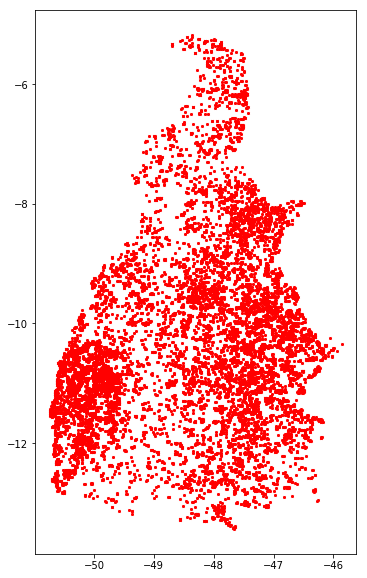

In [281]:
focos[focos.satelite_r == 't'].plot(marker='x', color='red', markersize=5, figsize=(20, 10));

Alterar o formato da coluna `timestamp` para o tipo `datetime` para facilitar a manipulação dos dados desta coluna:

In [129]:
focos["timestamp"] = pd.to_datetime(focos["timestamp"])

In [130]:
focos.dtypes

id                   float64
municipio             object
estado                object
regiao                object
pais                  object
satelite              object
bioma                 object
timestamp     datetime64[ns]
satelite_r            object
rand                 float64
geometry              object
dtype: object

In [131]:
focos.head()

,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,geometry
0,49684932.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-02-12 17:05:45,f,0.578124,POINT (-47.607 -5.673)
1,49685028.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-07-17 04:00:00,f,0.820325,POINT (-47.606 -5.581)
2,49685038.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,AQUA_M-T,Cerrado,2016-01-15 16:40:14,t,0.510514,POINT (-47.734 -5.562)
3,49685048.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-07-17 04:00:00,f,0.475267,POINT (-47.605 -5.58)
4,49685058.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-02-12 17:05:45,f,0.012324,POINT (-47.606 -5.677)


**Q1:** Qual a distribuição dos focos ao longo dos meses no ano de 2016 no Estado de Tocantins?

Para responder esta pergunta podemos utilizar o operador de agregação (sumarização) `groupby`, disponível em um `DataFrame`.  

Neste caso, precisaremos informar:
* O critério da agregação: a parte contendo o número do mês na coluna contendo a data e hora da detecção do foco (coluna `timestamp`).
* Utilizar uma das colunas para realizar a contagem através do operador `count`.

In [158]:
focos_mes = focos.groupby(focos.timestamp.dt.month).estado.count()

O objeto `focos_mes` retornado na operação acima corresponderá um `pandas.core.series.Series`:

In [159]:
type(focos_mes)

pandas.core.series.Series

In [160]:
focos_mes

timestamp
1       263
2      2519
3       714
4      2237
5      5830
6      8651
7     32451
8     55610
9     53969
10    33859
11     8066
12     1133
Name: estado, dtype: int64

Na saída acima podemo notar o seguinte:
* O nome da série é `estado`, por conta da coluna usada para realizar a contagem.
* Os índices da série correspondem ao índices numéricos dos meses do ano.

Podemo re-indexar a série pelo nome do mês do ano. Para isso, podemos construir uma função lambda e aplicá-la através do operador `map` a cada um dos valores numéricos do índice do ano. Para transformar o mês do ano em um nome, utilizaremos o módulo `calendar` da Biblioteca Padrão Python.

In [161]:
import calendar

novo_indice = map(lambda v : calendar.month_abbr[v], focos_mes.index)

In [162]:
new_idx

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

Agora podemos construir explicitamente a nova série através do construtor `pd.Series`:

In [163]:
focos_mes = pd.Series(data=focos_mes.values, index=novo_indice)

In [164]:
type(focos_mes)

pandas.core.series.Series

Podemos também ajustar o nome da série e o rótulo do índice:

In [170]:
focos_mes.name= "Número Focos/Mês"

focos_mes.index.name="mes"

In [171]:
focos_mes

mes
Jan      263
Feb     2519
Mar      714
Apr     2237
May     5830
Jun     8651
Jul    32451
Aug    55610
Sep    53969
Oct    33859
Nov     8066
Dec     1133
Name: Número Focos/Mês, dtype: int64

Podemos apresentar um gráfico de barras com o total de focos por mês:

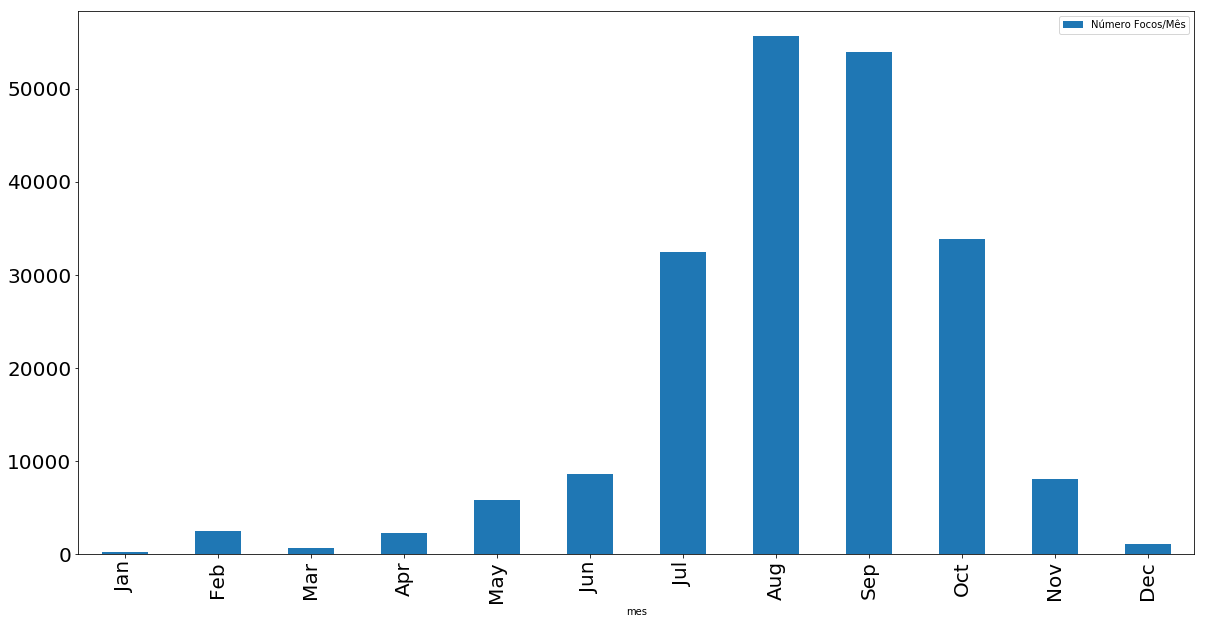

In [208]:
focos_mes.plot.bar(legend=True, fontsize=20, figsize=(20,10));

Podemos melhorar nosso gráfico controlando as diversas opções de plotagem fornecidas pela Matplotlib:

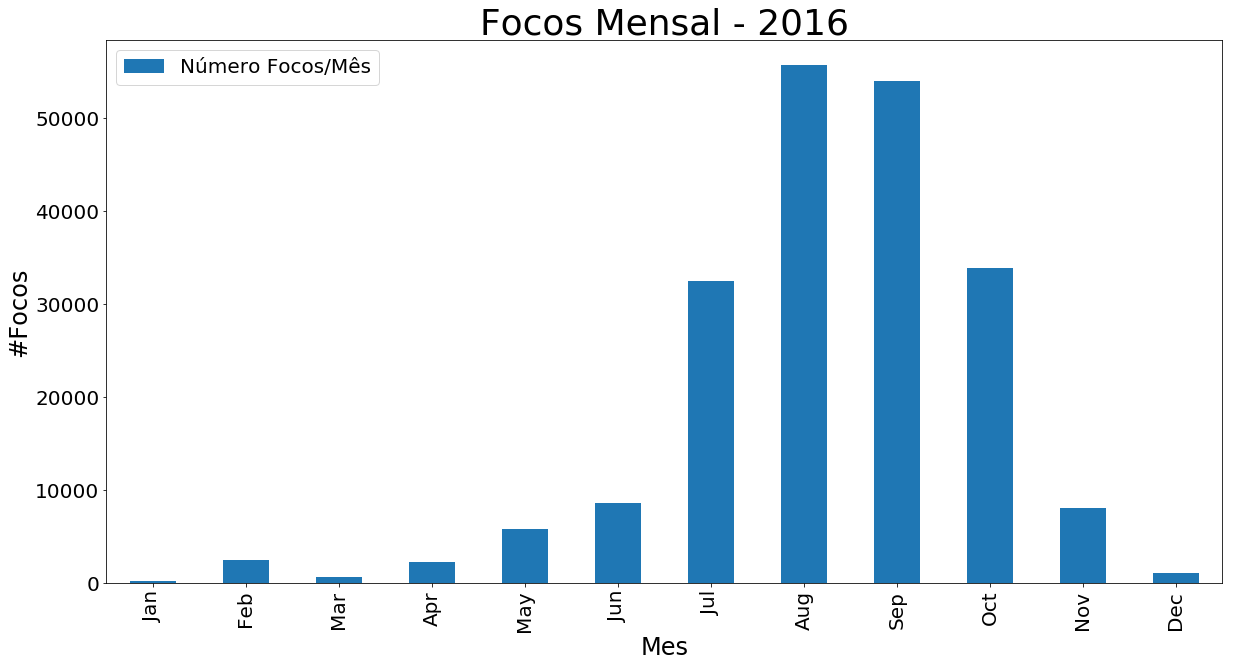

In [209]:
ax  = focos_mes.plot(kind="bar", legend=True, fontsize=20, figsize=(20,10));
ax.set_title("Focos Mensal - 2016", fontsize=36);
ax.set_xlabel("Mes", fontsize=24);
ax.set_ylabel("#Focos", fontsize=24);
ax.legend(loc=2, prop={'size': 20});

Podemos salvar a figura do gráfico gerado:

In [211]:
ax.figure.savefig("/home/gribeiro/Dados/Queimadas/focos/chart-focos-mes-2016.png",
                  dpi=100, format="png")

**Q2:** Qual a distribuição dos focos no ano de 2016 por bioma?

In [216]:
focos_bioma = focos.groupby("bioma").bioma.count()

Novamente teremos uma série de dados Pandas:

In [ ]:
type(focos_bioma)

Que podemos acertar o nome:

In [219]:
focos_bioma.index.name = "Biomas"
focos_bioma.name = "Numero Focos por Bioma"

focos_bioma

Biomas
Amazônia      5431
Cerrado     199871
Name: Numero Focos por Bioma, dtype: int64

Podemos agora desenhar um gráfico circular:

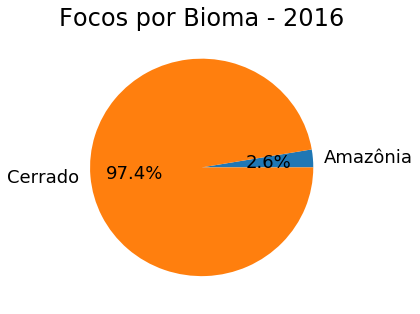

In [251]:
ax = focos_bioma.plot(kind="pie", autopct='%1.1f%%', figsize=(5,5), fontsize="18");
ax.set_title("Focos por Bioma - 2016", fontsize=24);
ax.set_ylabel("");

**Q3:** Qual a frequência mensal de queimadas por bioma?

Vamos adicionar uma nova coluna chamada `mes` no `GeoDataFrame` `focos`  para facilitar o processamento:

In [252]:
focos["mes"] = focos["timestamp"].dt.month

focos.head()

,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,geometry,mes
0,49684932.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-02-12 17:05:45,f,0.578124,POINT (-47.607 -5.673),2
1,49685028.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-07-17 04:00:00,f,0.820325,POINT (-47.606 -5.581),7
2,49685038.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,AQUA_M-T,Cerrado,2016-01-15 16:40:14,t,0.510514,POINT (-47.734 -5.562),1
3,49685048.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-07-17 04:00:00,f,0.475267,POINT (-47.605 -5.58),7
4,49685058.0,Sítio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-02-12 17:05:45,f,0.012324,POINT (-47.606 -5.677),2


Vamos apresentar as informações em uma `pivot_table`:

In [253]:
pvt = pd.pivot_table(focos, values="id", index=["bioma"],
                     columns=["mes"], aggfunc="count",
                     fill_value=0, margins=True)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez', 'total']

pvt

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
bioma,,,,,,,,,,,,,
Amazônia,28.0,302.0,27.0,51.0,82.0,191.0,413.0,703.0,1204.0,1798.0,563.0,69.0,5431.0
Cerrado,235.0,2217.0,687.0,2186.0,5748.0,8460.0,32038.0,54907.0,52765.0,32061.0,7503.0,1064.0,199871.0
All,263.0,2519.0,714.0,2237.0,5830.0,8651.0,32451.0,55610.0,53969.0,33859.0,8066.0,1133.0,205302.0


Vamos remover a totalização nas linhas e colunas para obter uma estatística descritiva:

In [265]:
pvt = pd.pivot_table(focos, values="id", index=["bioma"],
                     columns=["mes"], aggfunc="count",
                     fill_value=0)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

pvt

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
bioma,,,,,,,,,,,,
Amazônia,28,302,27,51,82,191,413,703,1204,1798,563,69
Cerrado,235,2217,687,2186,5748,8460,32038,54907,52765,32061,7503,1064


In [266]:
pvt.describe()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,131.500000,1259.500000,357.000000,1118.500000,2915.000000,4325.500000,16225.500000,27805.000000,26984.500000,16929.500000,4033.000000,566.500000
std,146.371104,1354.109486,466.690476,1509.672978,4006.467022,5847.065974,22362.251955,38328.015967,36459.132745,21399.172519,4907.321061,703.571247
min,28.000000,302.000000,27.000000,51.000000,82.000000,191.000000,413.000000,703.000000,1204.000000,1798.000000,563.000000,69.000000
25%,79.750000,780.750000,192.000000,584.750000,1498.500000,2258.250000,8319.250000,14254.000000,14094.250000,9363.750000,2298.000000,317.750000
50%,131.500000,1259.500000,357.000000,1118.500000,2915.000000,4325.500000,16225.500000,27805.000000,26984.500000,16929.500000,4033.000000,566.500000
75%,183.250000,1738.250000,522.000000,1652.250000,4331.500000,6392.750000,24131.750000,41356.000000,39874.750000,24495.250000,5768.000000,815.250000
max,235.000000,2217.000000,687.000000,2186.000000,5748.000000,8460.000000,32038.000000,54907.000000,52765.000000,32061.000000,7503.000000,1064.000000


In [282]:
municipios = gpd.read_file("/home/gribeiro/Dropbox/Dados/IBGE/organizacao territorial/BRMUE250GC_SIR.shp")

municipios.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,CAIUÁ,3509106,POLYGON ((-51.86001052999998 -21.5807199056459...
1,CASTILHO,3511003,POLYGON ((-51.41936432700003 -20.6810765586240...
2,DRACENA,3514403,POLYGON ((-51.48515406800003 -21.4276462056422...
3,ESTRELA DO NORTE,3515301,POLYGON ((-51.57097467399996 -22.3988718766653...
4,EUCLIDES DA CUNHA PAULISTA,3515350,POLYGON ((-52.44569233499996 -22.6082794076701...


Alterar o nome das colunas para facilitar nosso trabalho:

In [288]:
municipios.columns = ["nome", "cod_ibge", "geometry"]

municipios.head()

,nome,cod_ibge,geometry
0,CAIUÁ,3509106,POLYGON ((-51.86001052999998 -21.5807199056459...
1,CASTILHO,3511003,POLYGON ((-51.41936432700003 -20.6810765586240...
2,DRACENA,3514403,POLYGON ((-51.48515406800003 -21.4276462056422...
3,ESTRELA DO NORTE,3515301,POLYGON ((-51.57097467399996 -22.3988718766653...
4,EUCLIDES DA CUNHA PAULISTA,3515350,POLYGON ((-52.44569233499996 -22.6082794076701...


**Visualização 01:** Municípios de MG.

In [294]:
munic_to = municipios[municipios["cod_ibge"].str[0:2] == "17"]

munic_to.head()

,nome,cod_ibge,geometry
3047,ABREULÂNDIA,1700251,POLYGON ((-48.88649580000003 -9.77194564131597...
3048,AGUIARNÓPOLIS,1700301,POLYGON ((-47.43189905100002 -6.42546832321006...
3049,ALIANÇA DO TOCANTINS,1700350,POLYGON ((-48.54252495500002 -11.3833519943655...
3050,ALMAS,1700400,POLYGON ((-46.70340347199999 -11.1296492083578...
3051,ALVORADA,1700707,POLYGON ((-48.92153041399997 -12.2941030733930...


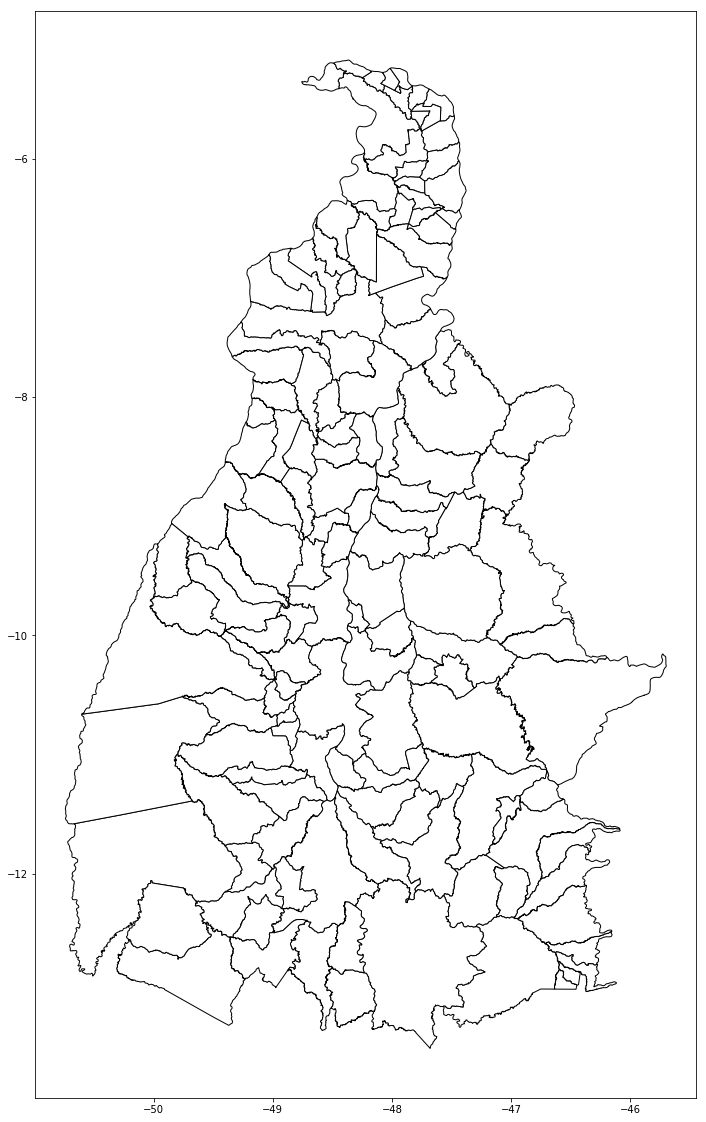

In [297]:
munic_to.plot(color='white', edgecolor='black', figsize=(30, 20));

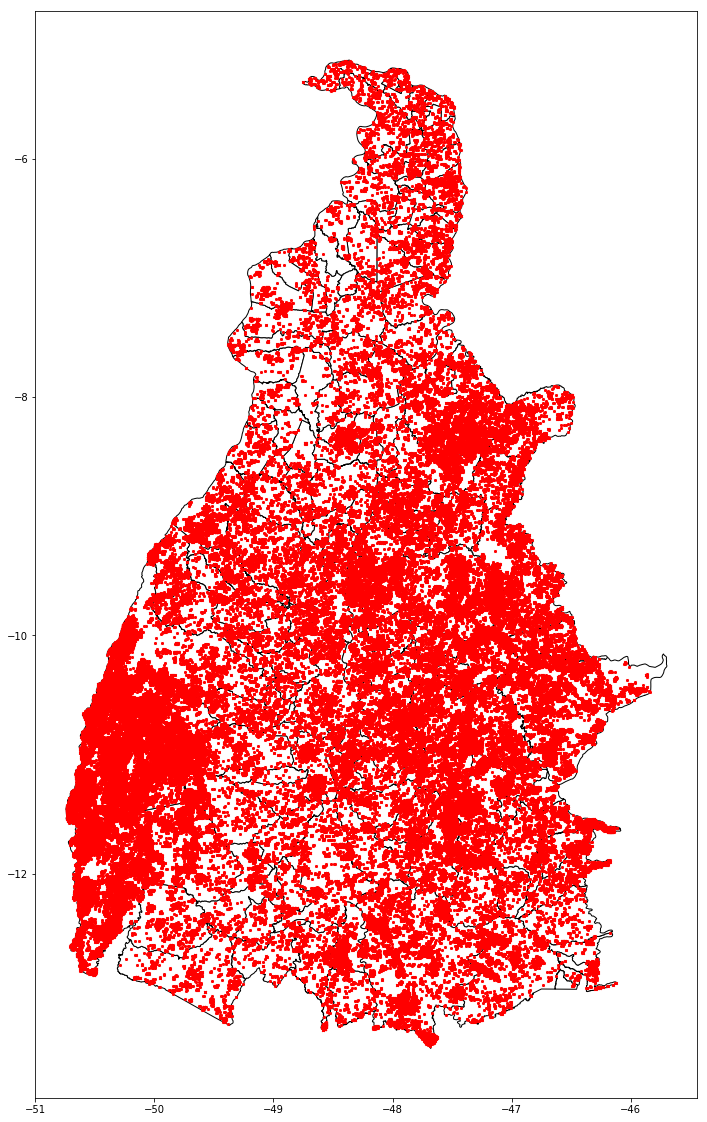

In [298]:
base = munic_to.plot(color='white', edgecolor='black', figsize=(30, 20));

focos.plot(ax=base, marker='x', color='red', markersize=5);

## Referências Online
<hr style="border:2px solid #0077b9;">

Tutoriais:
* [learnPython Essentials of Python](http://www.stephaniehicks.com/learnPython).

Documentação da Matplotlib:
* Opções de controle da legenda: [matplotlib.pyplot.legend](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend).
* Opções de salvamento da imagem de um gráfico: [matplotlib.pyplot.savefig](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.savefig.html).
* Opções dos tipos de gráficos básicos:
  * [matplotlib.pyplot.pie](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib-pyplot-pie).